<br/>

## Power Production - Simple Linear regression
---

### What is a Simple Linear Regression?

Simple linear regression is a statistical method for obtaining a formula to predict
values of one variable from another where there is a causal relationship between the
two variables. [*1*]

It works by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line [*2*]

Simple Linear regression is used to estimate the relationship between two quantitative variables when you want to know, for example, how strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion), or if you want to know the value of the dependent variable at a certain value of the independent variable ((e.g. the amount of soil erosion at a certain level of rainfall).[*2*]

#### Proposal investigation:

The goal for this project is to define which is the best cost function that can be applied to the Power Production dataset.

This dataset consist of 500 rows and 2 columns. The first column is the SPEED value and the second column is the POWER, correspondent to the SPEED column

For this, the project is divided between the tasks below:

1. Read the **POWERPRODUCTION** dataset using PANDAS dataframe and perform an initial analysis by plotting it with pyplot
2. Perform a manual simple linear regression 
3. Calculate the cost of the linear regression
4. Use *polyfit* function to verify if the manual method is correct

<br>

#### Initializing investigation of the powerproduction dataset

Importing the Python Libraries that will be needed for investigations

In [1]:
# Load libraries


# data manipulation and analysis
import pandas as pd

# data visualization library
import seaborn as sns

# Plotting
import matplotlib.pyplot as plt

# Multi-dimensional arrays
import numpy as np

<br>

Using PANDAS to import the dataset

In [2]:
dataset = pd.read_csv("powerproduction.txt") 
df = pd.read_csv("powerproduction.txt") 

Displaying the first 30 rows of dataset:

In [3]:
print(dataset.head(30)) # Prints the first 10 rows in dataset

    speed  power
0   0.000  0.000
1   0.125  0.000
2   0.150  0.000
3   0.225  0.000
4   0.275  0.000
5   0.325  4.331
6   0.400  5.186
7   0.450  3.826
8   0.501  1.048
9   0.526  5.553
10  0.551  6.498
11  0.576  5.241
12  0.626  4.220
13  0.676  7.974
14  0.701  9.746
15  0.726  0.000
16  0.751  0.000
17  0.801  7.271
18  0.826  0.795
19  0.851  7.350
20  0.926  1.996
21  0.951  1.609
22  0.976  2.064
23  1.001  6.511
24  1.026  0.000
25  1.051  2.085
26  1.076  0.000
27  1.101  0.121
28  1.151  1.208
29  1.251  3.373


At a first glance, by observing the data above, we can clearly see that the relation between **POWER** and **SPEED** is not linear

The next step will be plotting the dataset

Setting a better size and stile for the following plottings:

In [4]:
# Plot style.
plt.style.use("ggplot")

# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]



<br>

Plotting the dataset

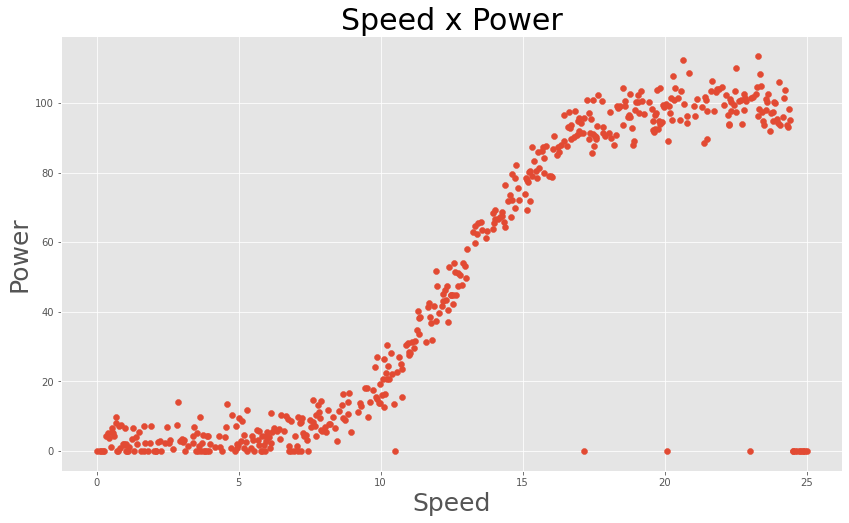

In [5]:
# Setting values for regression
x = dataset.iloc[:, 0].values # first column of data frame (first_name)
y = dataset.iloc[:, 1].values # second column of data frame (last_name)

# scatter plot of data set
plt.scatter(x, y);

# Title
plt.title("Speed x Power", fontsize=30)
    
# x label
plt.xlabel("Speed", fontsize=25)
    
# y label
plt.ylabel("Power", fontsize=25)

    
# Printing plot
plt.show()    


<br>

From the plotting above, we can see that a higher speed doesn't necessary meant more energy production (that can be seen from speed point 17 in the plot)

In addition, this plot is very alike to a [Sigmoid Function](https://mathworld.wolfram.com/SigmoidFunction.html)

<div>
<img src="https://github.com/thenriq/simple-linear-regression/blob/main/sigmoid_function.png?raw=true", width="600"/>
</div>

We can also observer from our plot that there are some points "out of the curve". For these points, even when speed is above 20, the energy production is zero. This might have happened due to incorrectly measuring or they were simply not recorded

The next step will be to manually perform a Simple Linear Regression

#### SIMPLE LINEAR REGRESSION

In [6]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of each column of dataframe
s_avg = np.mean(dataset["speed"])
p_avg = np.mean(dataset["power"])

# Subtract means from values
s_zero = dataset["speed"] - s_avg
p_zero = dataset["power"] - p_avg

# The best m is found by the following calculation.
m = np.sum(s_zero * p_zero) / np.sum(s_zero * s_zero)
# Use m from above to calculate the best c.
c = p_avg - m * s_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.917596 and c is -13.899903.


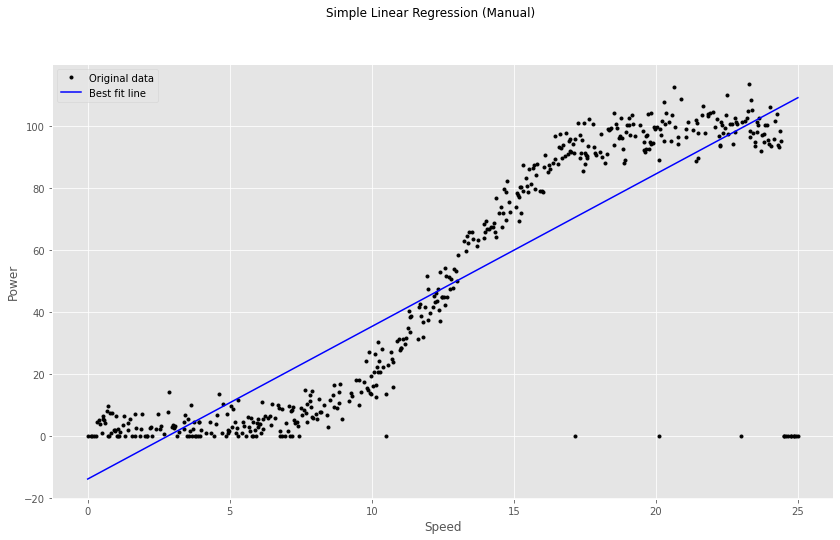

Cost with m =  4.92 and c = -13.90: 28435797.70


In [7]:
# Plot the best fit line.
plt.plot(dataset["speed"], dataset["power"], 'k.', label='Original data')
plt.plot(dataset["speed"], m * dataset["speed"] + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.suptitle("Simple Linear Regression (Manual)")
plt.xlabel('Speed')
plt.ylabel('Power')
plt.legend()

# Show the plot.
plt.show()

cost = lambda m,c: np.sum([(dataset["power"][i] - m * dataset["power"][i] - c)**2 for i in range(dataset["power"].size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

In [8]:
np.polyfit(x, y, 1)

array([  4.91759567, -13.89990263])